In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score
data=pd.read_csv("titanic_dataset.csv")


In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape

(891, 12)

**Fill in all the missing values present in all the columns in the dataset**


<AxesSubplot:>

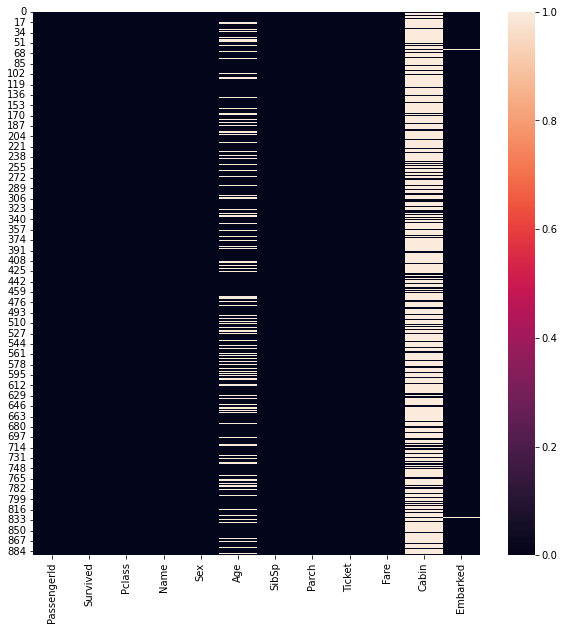

In [5]:
a=data.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(a)

In [6]:
data['Age']=data['Age'].fillna(data["Age"].median())


In [7]:
for i in ['Cabin','Embarked']:
    data[i].fillna(data[i].value_counts().index[0],inplace=True)

<AxesSubplot:>

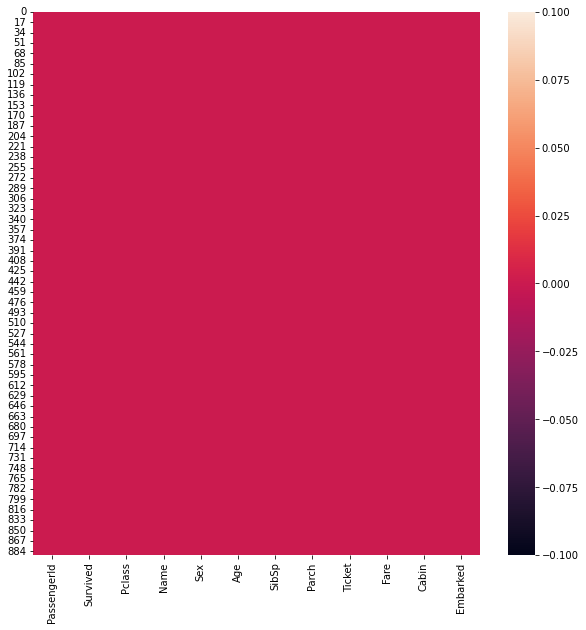

In [8]:
a=data.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(a)

**Check and handle outliers**

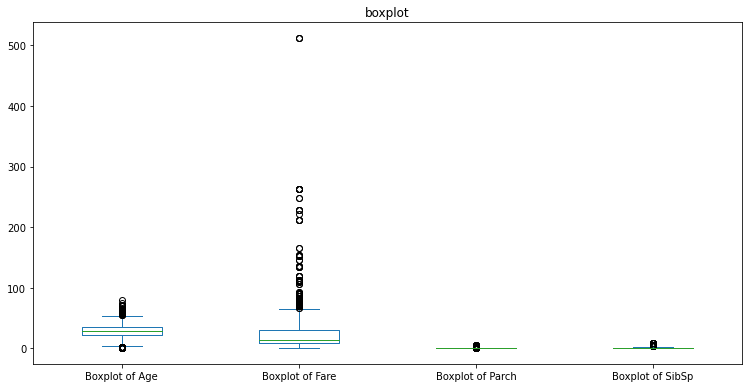

In [9]:
plt.rcParams["figure.figsize"] = [10.50, 5.50]
plt.rcParams["figure.autolayout"] = True
dat = pd.DataFrame({"Boxplot of Age": data['Age'], "Boxplot of Fare": data['Fare'],"Boxplot of Parch":data['Parch'],"Boxplot of SibSp":data['SibSp']})
dat[['Boxplot of Age', 'Boxplot of Fare','Boxplot of Parch','Boxplot of SibSp']].plot(kind='box', title='boxplot')
plt.show()

In [10]:
for x in range(1,7):
    for i in ['Age','SibSp','Fare','Parch']:
        Q1=np.percentile(data[i],25, interpolation='midpoint')
        Q2=np.percentile(data[i],50, interpolation='midpoint')
        Q3=np.percentile(data[i],75, interpolation='midpoint')
        iqr=Q3-Q1
        low_lim=Q1-1.5*iqr
        up_lim=Q3+1.5*iqr
        ind1=data[i]>up_lim
        ind2=data[i]<low_lim
        q=data.loc[ind1].index
        r=data.loc[ind2].index
        data.drop(q, inplace=True)
        data.drop(r,inplace=True)

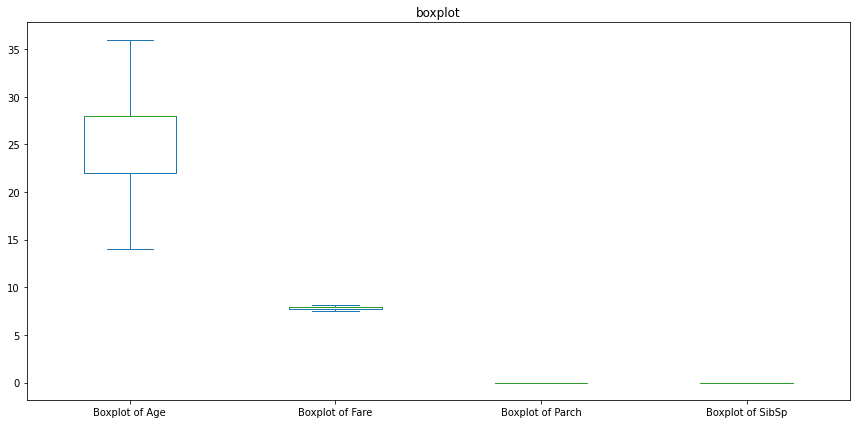

In [11]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True
dat = pd.DataFrame({"Boxplot of Age": data['Age'], "Boxplot of Fare": data['Fare'],"Boxplot of Parch":data['Parch'],"Boxplot of SibSp":data['SibSp']})
dat[['Boxplot of Age', 'Boxplot of Fare','Boxplot of Parch','Boxplot of SibSp']].plot(kind='box', title='boxplot')
plt.show()

<AxesSubplot:>

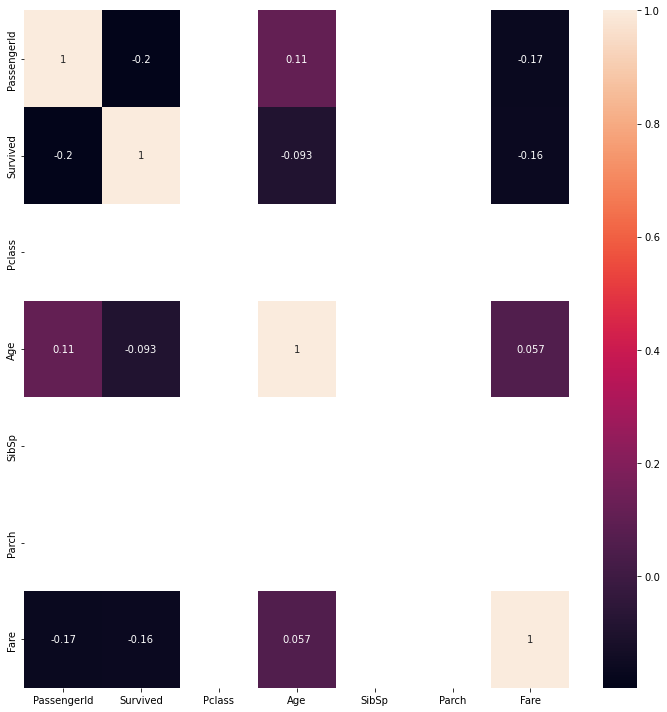

In [12]:
# Checking the correlation

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [13]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

a=['Sex','Embarked']
for i in np.arange(len(a)):
    data[a[i]]= le.fit_transform(data[a[i]])
    

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,B96 B98,2
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,14.0,0,0,350406,7.8542,B96 B98,2
22,23,1,3,"McGowan, Miss. Anna ""Annie""",0,15.0,0,0,330923,8.0292,B96 B98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
870,871,0,3,"Balkic, Mr. Cerin",1,26.0,0,0,349248,7.8958,B96 B98,2
877,878,0,3,"Petroff, Mr. Nedelio",1,19.0,0,0,349212,7.8958,B96 B98,2
878,879,0,3,"Laleff, Mr. Kristo",1,28.0,0,0,349217,7.8958,B96 B98,2
881,882,0,3,"Markun, Mr. Johann",1,33.0,0,0,349257,7.8958,B96 B98,2


In [15]:
#feature reduction
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [16]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
data[["ScaledAge","ScaledFare"]] = scaler.fit_transform(data[["Age", "Fare"]])

In [17]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ScaledAge,ScaledFare
2,1,3,0,26.0,0,0,7.9250,2,0.545455,0.647849
4,0,3,1,35.0,0,0,8.0500,2,0.954545,0.836528
12,0,3,1,20.0,0,0,8.0500,2,0.272727,0.836528
14,0,3,0,14.0,0,0,7.8542,2,0.000000,0.540981
22,1,3,0,15.0,0,0,8.0292,1,0.045455,0.805132
...,...,...,...,...,...,...,...,...,...,...
870,0,3,1,26.0,0,0,7.8958,2,0.545455,0.603774
877,0,3,1,19.0,0,0,7.8958,2,0.227273,0.603774
878,0,3,1,28.0,0,0,7.8958,2,0.636364,0.603774
881,0,3,1,33.0,0,0,7.8958,2,0.863636,0.603774


In [18]:
# Splitting the Data

from sklearn.model_selection import train_test_split
y= data['Survived']
x= data.drop(['Survived', 'Age','Fare'], axis=1)
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 30,test_size= 0.2)


**ML algorithms**

In [19]:
 # Applying Bernoulli Naive Bayes Classifier

from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(x_train, y_train)
y_pred1= classifier.predict(x_test)
y_train_pred1= classifier.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print('Accuracy Score is:', accuracy_score(y_test, y_pred1))
print('Recall Score is:', recall_score(y_test, y_pred1))
print('Precision Score:', precision_score(y_test, y_pred1))
print('F1 score is:', f1_score(y_test, y_pred1))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred1))

Training Accuracy is :  0.8308823529411765
Accuracy Score is: 0.8571428571428571
Recall Score is: 0.8333333333333334
Precision Score: 0.5555555555555556
F1 score is: 0.6666666666666667

 The confusion matrix is : 
 [[25  4]
 [ 1  5]]


In [20]:
# Applying Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
Classifier= GaussianNB()
Classifier.fit(x_train, y_train)
y_pred= Classifier.predict(x_test)
y_train_pred= Classifier.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred))

Training Accuracy is :  0.8235294117647058
Accuracy Score is: 0.8571428571428571
Recall Score is: 0.8333333333333334
Precision Score: 0.5555555555555556
F1 score is: 0.6666666666666667

 The confusion matrix is : 
 [[25  4]
 [ 1  5]]


In [21]:
# Applying SVM Model
from sklearn import svm
from sklearn.svm import SVC

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
y_pred4 = svm_linear.predict(x_test)

y_train_pred4 = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred4))

Training Accuracy is :  0.8308823529411765
Accuracy Score is: 0.8571428571428571
Recall Score is: 0.8333333333333334
Precision Score: 0.5555555555555556
F1 score is: 0.6666666666666667

 The confusion matrix is : 
 [[25  4]
 [ 1  5]]


In [22]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
y_pred6 = log_model.predict(x_test)

y_train_pred6= log_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred6))
print('Accuracy Score is:', accuracy_score(y_test, y_pred6))
print('Recall Score is:', recall_score(y_test, y_pred6))
print('Precision Score:', precision_score(y_test, y_pred6))
print('F1 score is:', f1_score(y_test, y_pred6))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred6))

Training Accuracy is :  0.8308823529411765
Accuracy Score is: 0.8571428571428571
Recall Score is: 0.8333333333333334
Precision Score: 0.5555555555555556
F1 score is: 0.6666666666666667

 The confusion matrix is : 
 [[25  4]
 [ 1  5]]


In [23]:
# Applying KNN model

from sklearn.neighbors import KNeighborsClassifier
classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
y_pred5 = classifer.predict(x_test)

y_train_pred5 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred5))
print('Accuracy Score is:', accuracy_score(y_test, y_pred5))
print('Recall Score is:', recall_score(y_test, y_pred5))
print('Precision Score:', precision_score(y_test, y_pred5))
print('F1 score is:', f1_score(y_test, y_pred5))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred5))

Training Accuracy is :  0.8382352941176471
Accuracy Score is: 0.8857142857142857
Recall Score is: 0.6666666666666666
Precision Score: 0.6666666666666666
F1 score is: 0.6666666666666666

 The confusion matrix is : 
 [[27  2]
 [ 2  4]]


In [24]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred3= rf_model.predict(x_test)

y_train_pred3= rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print('Accuracy Score is:', accuracy_score(y_test, y_pred3))
print('Recall Score is:', recall_score(y_test, y_pred3))
print('Precision Score:', precision_score(y_test, y_pred3))
print('F1 score is:', f1_score(y_test, y_pred3))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred3))

Training Accuracy is :  0.9558823529411765
Accuracy Score is: 0.8857142857142857
Recall Score is: 0.8333333333333334
Precision Score: 0.625
F1 score is: 0.7142857142857143

 The confusion matrix is : 
 [[26  3]
 [ 1  5]]


In [25]:
# Applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2= dt.predict(x_test)

y_train_pred2 = dt.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2))
print('Accuracy Score is:', accuracy_score(y_test, y_pred2))
print('Recall Score is:', recall_score(y_test, y_pred2))
print('Precision Score:', precision_score(y_test, y_pred2))
print('F1 score is:', f1_score(y_test, y_pred2))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred2))

Training Accuracy is :  0.9558823529411765
Accuracy Score is: 0.8857142857142857
Recall Score is: 0.8333333333333334
Precision Score: 0.625
F1 score is: 0.7142857142857143

 The confusion matrix is : 
 [[26  3]
 [ 1  5]]


The accuracy score of the various models are as follows:

Accuracy Score of Gaussian NB 0.85 is

Accuracy Score of Bernoulli NB is 085

Accuracy score of Logistic Regression Model is 0.85

Accuracy score of KNN Model is 0.88

Accuracy score of Linear SVM Model is, 0.85

Accuracy score of Decision Tree Model is, 0.88

Accuracy score of Random Forest Classifier Model is, 0.88

**Hence we can conclude that random forest classifier,knn model and decision tree model has a good accuracy than other ML models**